In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\Kartik DataScience\Python\Assignment 17\mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [5]:
categorical_columns=['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','class','habitat','stalk_height','cap_diameter']
label_encoders = {col: LabelEncoder() for col in categorical_columns}
df[categorical_columns].apply(lambda x: label_encoders[x.name].fit(x))
df[categorical_columns] = df[categorical_columns].apply(lambda x: label_encoders[x.name].transform(x))
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,283,680
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,335,521
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,859,438
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,679,320


In [6]:
df.corr()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,1.000000,0.076872,-0.018136,0.024111,-0.046627,-0.012730,-0.005051,0.048191,-0.022992,0.038452,...,0.019658,-0.048383,-0.067070,0.022166,-0.003308,0.018726,0.051532,0.005902,-0.002484,0.050856
cap_shape,0.076872,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,...,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140,0.023586,0.038942
cap_surface,-0.018136,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,...,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409,0.043168,0.016084
cap_color,0.024111,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,...,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029,0.043899,-0.000427
bruises,-0.046627,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,...,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498,0.066449,-0.045774
odor,-0.012730,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,...,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536,0.012637,-0.054402
gill_attachment,-0.005051,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,...,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194,-0.015984,-0.041098
gill_spacing,0.048191,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,...,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505,0.014766,0.030303
gill_size,-0.022992,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,...,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858,-0.001054,-0.068738
gill_color,0.038452,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,...,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,-0.028083,0.026476,0.004822


In [7]:
df.drop(['ring_type', 'veil_color','stalk_surface_above_ring','cap_surface','cap_color','bruises','gill_attachment','gill_color','stalk_color_above_ring','ring_number','habitat','stalk_height','cap_diameter','stalk_surface_below_ring'],axis=1,inplace=True)

In [8]:
df.corr()

,Unnamed: 0,cap_shape,odor,gill_spacing,gill_size,stalk_shape,stalk_root,stalk_color_below_ring,veil_type,spore_print_color,population,class
Unnamed: 0,1.000000,0.076872,-0.012730,0.048191,-0.022992,-0.022255,0.013280,0.014746,0.019658,-0.003308,0.018726,0.005902
cap_shape,0.076872,1.000000,-0.030119,-0.048783,0.040497,0.011573,0.057405,0.027522,-0.039029,0.024596,0.003602,0.001140
odor,-0.012730,-0.030119,1.000000,-0.002847,-0.027313,0.009072,-0.005430,-0.007103,0.028177,-0.057705,-0.011753,0.039536
gill_spacing,0.048191,-0.048783,-0.002847,1.000000,-0.022650,0.051041,0.000668,0.003012,-0.016567,0.016376,-0.004920,0.046505
gill_size,-0.022992,0.040497,-0.027313,-0.022650,1.000000,-0.046759,0.079320,-0.025614,-0.029072,0.039395,0.018937,0.019858
stalk_shape,-0.022255,0.011573,0.009072,0.051041,-0.046759,1.000000,-0.036714,0.046013,0.004404,0.027410,-0.000393,0.024023
stalk_root,0.013280,0.057405,-0.005430,0.000668,0.079320,-0.036714,1.000000,-0.000029,0.001088,-0.018022,-0.001400,0.054233
stalk_color_below_ring,0.014746,0.027522,-0.007103,0.003012,-0.025614,0.046013,-0.000029,1.000000,-0.018799,-0.005578,-0.000937,0.016777
veil_type,0.019658,-0.039029,0.028177,-0.016567,-0.029072,0.004404,0.001088,-0.018799,1.000000,-0.026180,0.036622,0.013094
spore_print_color,-0.003308,0.024596,-0.057705,0.016376,0.039395,0.027410,-0.018022,-0.005578,-0.026180,1.000000,-0.012948,0.006375


In [9]:
X=df.drop(['class'],axis=1)
y=df['class']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [11]:
X_train

,Unnamed: 0,cap_shape,odor,gill_spacing,gill_size,stalk_shape,stalk_root,stalk_color_below_ring,veil_type,spore_print_color,population
1519,1191,2,4,2,1,0,0,1,1,4,2
1068,1002,2,8,1,0,1,3,0,1,0,0
631,735,1,1,2,0,1,4,0,1,8,2
508,829,0,7,2,0,1,5,8,0,8,5
1006,374,2,6,1,1,0,6,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
321,279,2,6,1,0,0,2,6,1,8,5
1104,757,3,1,0,1,0,2,0,0,8,3
1932,808,2,7,1,0,1,0,5,1,4,0
931,245,2,7,0,1,0,6,2,0,0,1


In [12]:
X_test

,Unnamed: 0,cap_shape,odor,gill_spacing,gill_size,stalk_shape,stalk_root,stalk_color_below_ring,veil_type,spore_print_color,population
751,143,2,2,2,1,1,0,5,0,6,5
1545,100,2,8,1,1,1,2,7,1,3,2
881,439,3,2,0,1,0,2,1,0,3,0
396,896,0,8,1,1,1,0,3,0,3,1
509,1219,2,0,0,0,0,6,4,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...
1518,951,0,7,0,1,1,6,7,1,7,4
1398,771,3,8,1,0,1,4,8,0,4,5
1091,688,2,5,0,0,0,0,6,0,0,1
1390,138,3,1,2,1,0,0,5,1,6,4


In [13]:
y_train

1519    1
1068    0
631     1
508     1
1006    1
       ..
321     1
1104    1
1932    0
931     1
1984    1
Name: class, Length: 1600, dtype: int32

In [14]:
y_test

751     1
1545    1
881     1
396     1
509     1
       ..
1518    1
1398    1
1091    1
1390    1
783     1
Name: class, Length: 400, dtype: int32

In [15]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

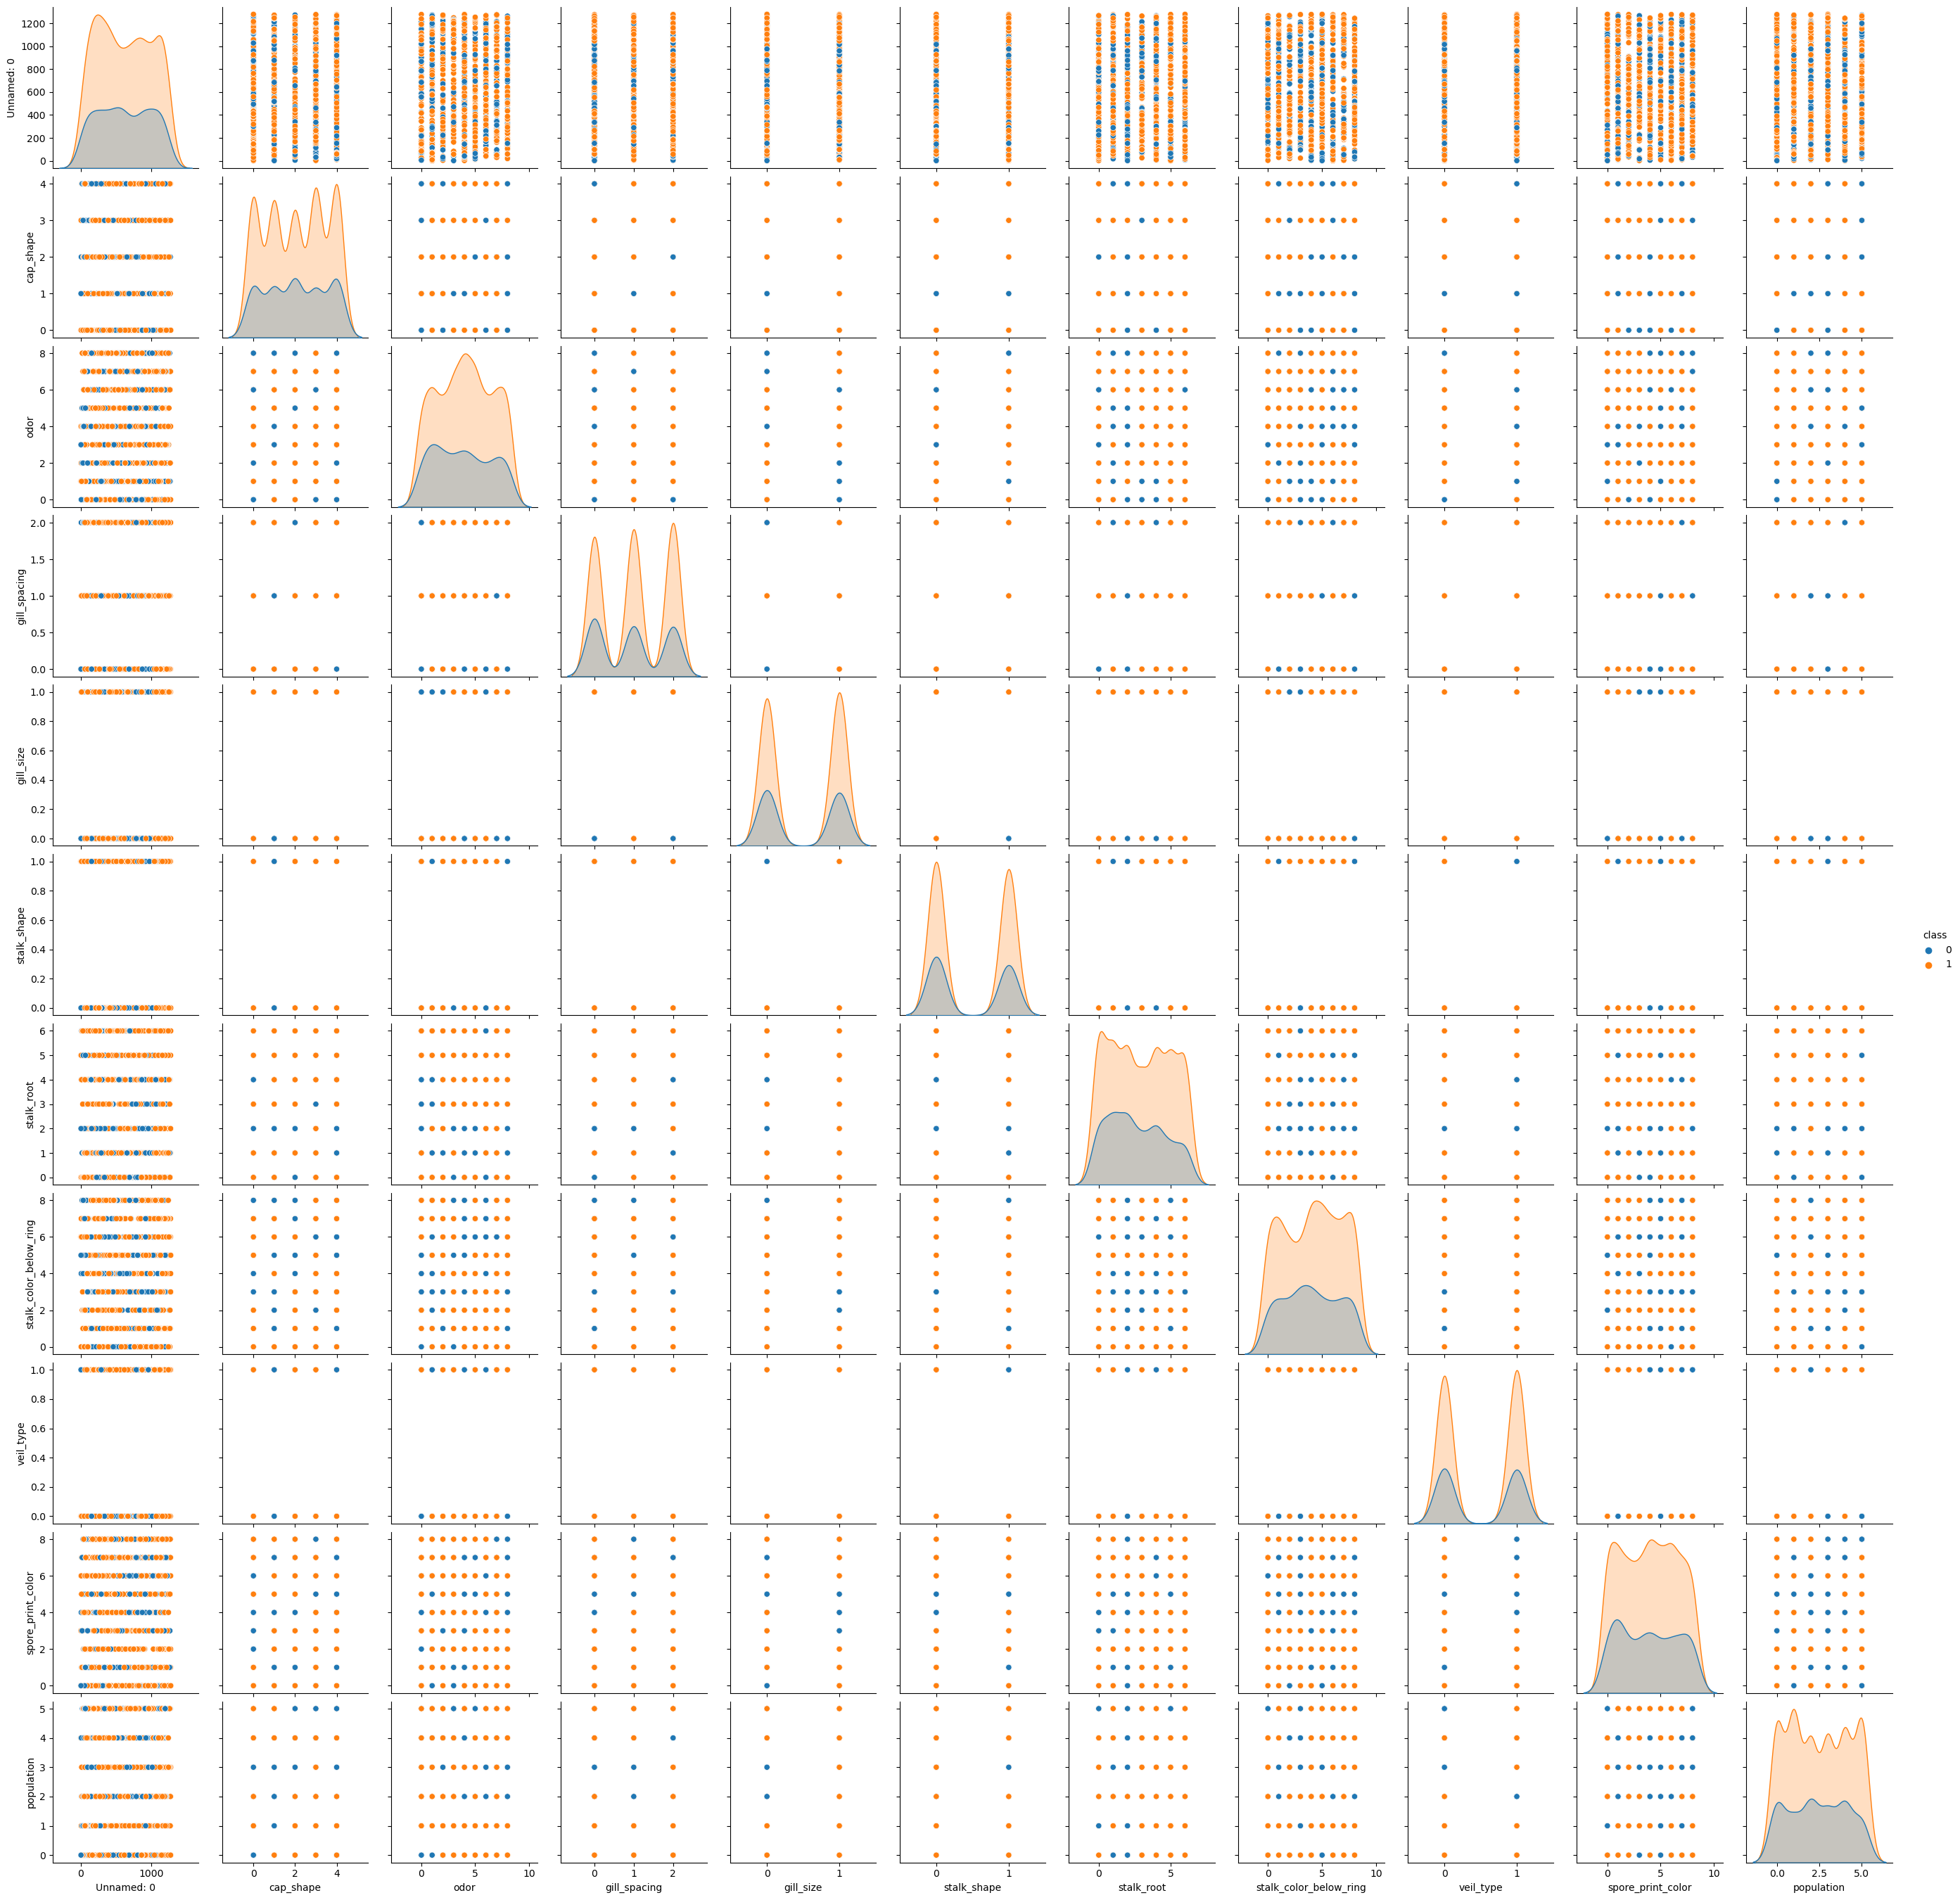

In [16]:
sns.pairplot(df, hue='class')
plt.show()

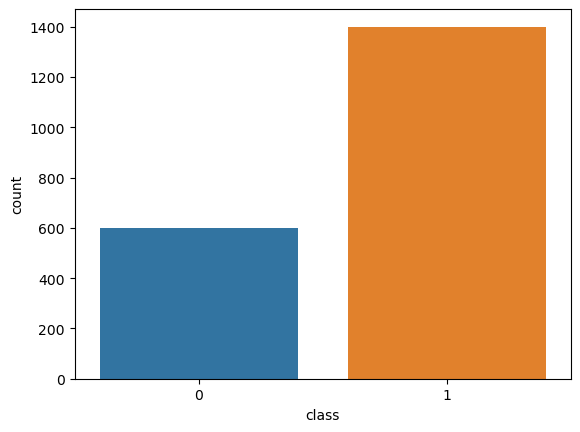

In [17]:
sns.countplot(x='class', data=df)
plt.show()

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [19]:
svm_classifier = SVC(kernel='linear', random_state=41)

In [20]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=41)

In [21]:
y_pred=svm_classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 68.75


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.69      1.00      0.81       275

    accuracy                           0.69       400
   macro avg       0.34      0.50      0.41       400
weighted avg       0.47      0.69      0.56       400



c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\envs\kartik_env\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
